<a href="https://colab.research.google.com/github/Eieiz007/Deep-learning/blob/main/LSTM_Many_to_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import numpy as np
import tensorflow as tf
import pandas as pd

import tensorflow as tf

from tensorflow.keras.optimizers import Adam , AdamW
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense , LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler

Create data

In [113]:
num_days = 700
dates = pd.date_range(start="2020-01-01", periods=num_days, freq="D")
oil_prices = 50 + 5 * np.sin(np.linspace(0, 20, num_days)) + np.random.normal(0, 1, num_days)
temperature = 30 + 10 * np.sin(np.linspace(0, 10, num_days)) + np.random.normal(0, 1, num_days)

df = pd.DataFrame({"Date": dates, "Oil_Price": oil_prices, "Temperature": temperature})

df.head()

,Date,Oil_Price,Temperature
0,2020-01-01,50.750578,30.750302
1,2020-01-02,50.167612,27.830114
2,2020-01-03,52.056519,29.619802
3,2020-01-04,51.239175,31.333867
4,2020-01-05,48.185642,29.459737


prepartation data

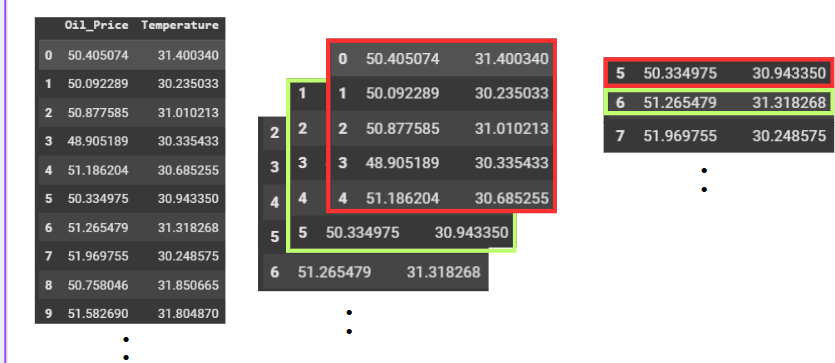

In [114]:
time_step = 20 #ใช้ข้อมูลก่อนหน้า 5 ทำนาย


In [115]:
# iloc[row,column]
#len(row) - time_step = n_subsets
print(len(df))


# y = 6 , x = [1,2,3,4,5]
# y = 7 , x = [2,3,4,5,6]
# ..............
# y = 500 , x = [495,496,497,498,499] 495 subsets


700


In [116]:
X, y = [], []

for i in range(len(df) - time_step):
    X.append(df.iloc[i:i+time_step, 1:].values)  # ใช้เฉพาะฟีเจอร์ Oil_Price และ Temperature
    # iloc[0:1+5] = [0 1 2 3 4]
    y.append(df.iloc[i+time_step, 1:].values)   # Target คือค่าของวันถัดไป
    # iloc[0+5] = [6]


In [117]:
X[:2]

[array([[50.75057797, 30.75030165],
        [50.16761245, 27.83011399],
        [52.05651888, 29.61980169],
        [51.23917468, 31.33386688],
        [48.18564174, 29.4597368 ],
        [51.20171182, 30.58619791],
        [50.09203629, 31.25972536],
        [51.5261269 , 29.20256854],
        [50.7590316 , 31.26813211],
        [50.99865865, 29.52359732],
        [51.44075939, 29.30016424],
        [53.06323971, 32.15065039],
        [51.41113672, 31.36910066],
        [52.05552062, 31.98356121],
        [52.44388282, 32.50429126],
        [52.03568227, 31.00706629],
        [52.867849  , 30.21095301],
        [53.35350524, 31.34759598],
        [52.32800488, 33.53075628],
        [53.15362073, 33.28680279]]),
 array([[50.16761245, 27.83011399],
        [52.05651888, 29.61980169],
        [51.23917468, 31.33386688],
        [48.18564174, 29.4597368 ],
        [51.20171182, 30.58619791],
        [50.09203629, 31.25972536],
        [51.5261269 , 29.20256854],
        [50.7590316 , 31.2

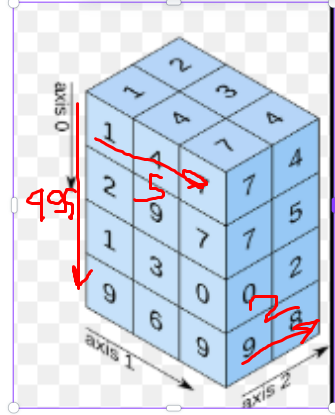

In [118]:
# แปลงเป็น numpy array
X = np.array(X)
y = np.array(y)

# ตรวจสอบ shape
X.shape, y.shape

((680, 20, 2), (680, 2))

splitting data

In [119]:
# แบ่งข้อมูล Train (70%) และ (Val+Test) (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False) #ห้ามสุ่มเพราะเป็น time series
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [120]:
X_train.reshape(-1, X_train.shape[-1]) #ลดให้เหลือ 2D เพราะ standardization must 2d

array([[50.75057797, 30.75030165],
       [50.16761245, 27.83011399],
       [52.05651888, 29.61980169],
       ...,
       [53.97664356, 37.04875252],
       [53.35366458, 35.89594458],
       [55.62833122, 35.6730368 ]])

In [121]:
#แปลงกลับ
X_train.reshape(-1, X_train.shape[-1]).reshape(X_train.shape)[:2] # == x_train แปลงกลับมา 3D เหมือนเดิม

array([[[50.75057797, 30.75030165],
        [50.16761245, 27.83011399],
        [52.05651888, 29.61980169],
        [51.23917468, 31.33386688],
        [48.18564174, 29.4597368 ],
        [51.20171182, 30.58619791],
        [50.09203629, 31.25972536],
        [51.5261269 , 29.20256854],
        [50.7590316 , 31.26813211],
        [50.99865865, 29.52359732],
        [51.44075939, 29.30016424],
        [53.06323971, 32.15065039],
        [51.41113672, 31.36910066],
        [52.05552062, 31.98356121],
        [52.44388282, 32.50429126],
        [52.03568227, 31.00706629],
        [52.867849  , 30.21095301],
        [53.35350524, 31.34759598],
        [52.32800488, 33.53075628],
        [53.15362073, 33.28680279]],

       [[50.16761245, 27.83011399],
        [52.05651888, 29.61980169],
        [51.23917468, 31.33386688],
        [48.18564174, 29.4597368 ],
        [51.20171182, 30.58619791],
        [50.09203629, 31.25972536],
        [51.5261269 , 29.20256854],
        [50.7590316 , 31.2

In [122]:

# สร้างตัวแปร StandardScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit transform กับ Training data และ Transform ชุดอื่น ๆ
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = scaler_X.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

y_train_scaled = scaler_y.fit_transform(y_train) #y ต้องแปลงด้วยเพราะ เกิดจาก วันถัดไปของ time_step ทีตั้งเอาไว้ ค่ามันเยอะ
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

# ตรวจสอบ shape
print("Train shape:", X_train_scaled.shape, y_train_scaled.shape)
print("Validation shape:", X_val_scaled.shape, y_val_scaled.shape)
print("Test shape:", X_test_scaled.shape, y_test_scaled.shape)


Train shape: (476, 20, 2) (476, 2)
Validation shape: (102, 20, 2) (102, 2)
Test shape: (102, 20, 2) (102, 2)


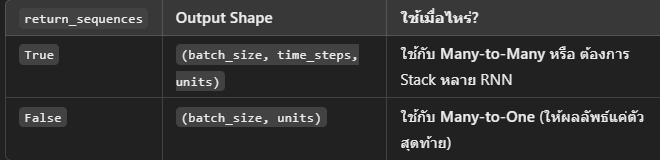

In [123]:
"""
Many to one  = return_sequences=False
input_shape = (time_steps, features)

"""

# สร้างโมเดล LSTM (Many-to-One)
model = Sequential([
    LSTM(256, activation='gelu', return_sequences=False, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dense(128, activation='gelu'), #FC
    Dense(64, activation='gelu'), #FC
    # BacthNormalization()
    Dense(2)  # Output 2 ค่า (Oil_Price, Temperature)
])

# คอมไพล์โมเดล
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Train โมเดล
history = model.fit(X_train_scaled, y_train_scaled,
                    validation_data=(X_val_scaled, y_val_scaled),
                    epochs=50, batch_size=64, verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.3447 - val_loss: 0.5138
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.3361 - val_loss: 0.4893
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.3028 - val_loss: 0.4636
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.2839 - val_loss: 0.4351
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.2754 - val_loss: 0.4018
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.2551 - val_loss: 0.3621
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.2346 - val_loss: 0.3134
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.1950 - val_loss: 0.2536
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.1558 - val_loss: 0.1787
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.1148 - val_loss: 0.0933
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 0.0647 - val_loss: 0.0382
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - loss: 0.0410 - val_loss: 0.0619
Epoch 13

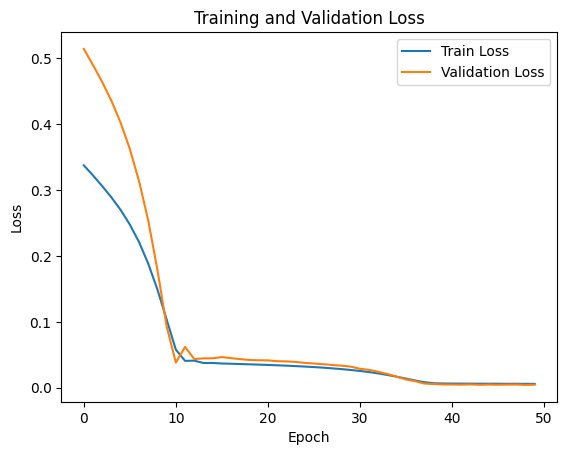

In [125]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [126]:
# ทดสอบโมเดลกับ Test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred_scaled[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


array([[0.17898875, 0.8145188 ],
       [0.18850201, 0.81571937],
       [0.18648018, 0.80582535],
       [0.18269081, 0.80515385],
       [0.19013122, 0.79680735]], dtype=float32)

In [136]:
# แปลงค่ากลับเป็นสเกลเดิม
y_pred = scaler_y.inverse_transform(y_pred_scaled) #Nomalization ไม่ต้องแปลงกลับ
y_test = scaler_y.inverse_transform(y_test_scaled)
y_pred[:5] ,y_test[:5]

(array([[45.51484 , 37.50863 ],
        [45.65312 , 37.537666],
        [45.62373 , 37.298363],
        [45.56865 , 37.28212 ],
        [45.6768  , 37.080246]], dtype=float32),
 array([[46.95042651, 38.52551716],
        [44.83314658, 36.3399668 ],
        [44.60184257, 38.18840485],
        [46.4920897 , 36.38534566],
        [45.10726848, 37.08588685]]))

In [128]:
df_result = pd.DataFrame({'Actual_Oil': y_test[:, 0], 'Predicted_Oil': y_pred[:, 0],
                          'Actual_Temp': y_test[:, 1], 'Predicted_Temp': y_pred[:, 1]})
df_result

,Actual_Oil,Predicted_Oil,Actual_Temp,Predicted_Temp
0,46.950427,45.514839,38.525517,37.508629
1,44.833147,45.653118,36.339967,37.537666
2,44.601843,45.623730,38.188405,37.298363
3,46.492090,45.568649,36.385346,37.282120
4,45.107268,45.676800,37.085887,37.080246
...,...,...,...,...
97,52.726027,53.537769,24.322060,25.615702
98,53.955716,53.484615,25.941843,25.432627
99,55.882055,53.583630,24.819788,25.382082
100,55.824114,53.843182,23.270296,25.255943


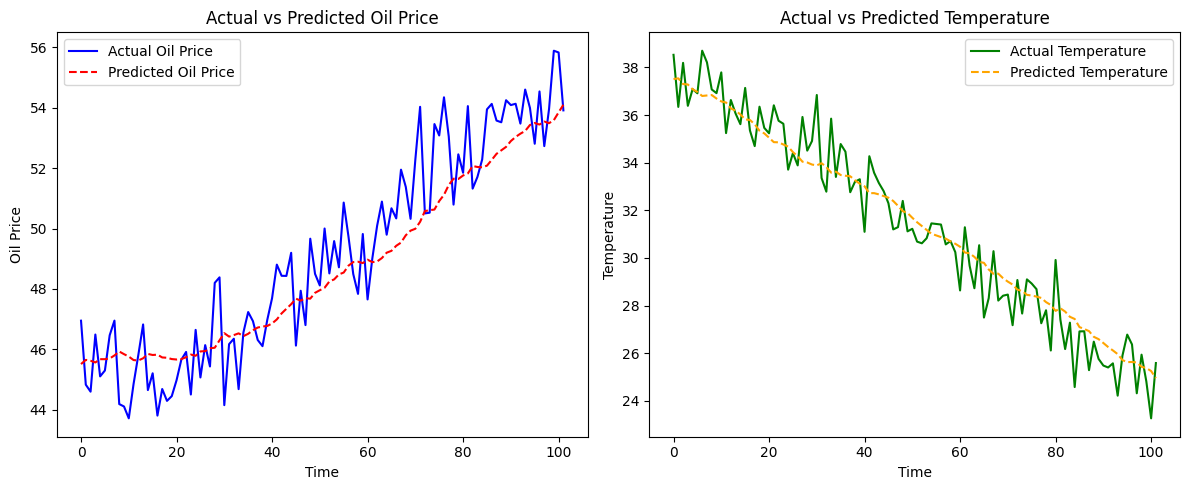

In [137]:

# ตั้งค่าขนาดของกราฟ
plt.figure(figsize=(12, 5))

# 🔹 Plot ราคาน้ำมัน (Oil Price)
plt.subplot(1, 2, 1)  # 1 แถว 2 คอลัมน์ กราฟแรก
plt.plot(df_result['Actual_Oil'], label='Actual Oil Price', color='blue')
plt.plot(df_result['Predicted_Oil'], label='Predicted Oil Price', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.title('Actual vs Predicted Oil Price')
plt.legend()

# 🔹 Plot อุณหภูมิ (Temperature)
plt.subplot(1, 2, 2)  # กราฟที่สอง
plt.plot(df_result['Actual_Temp'], label='Actual Temperature', color='green')
plt.plot(df_result['Predicted_Temp'], label='Predicted Temperature', color='orange', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()

# แสดงกราฟ
plt.tight_layout()
plt.show()


In [130]:
# 🔹 คำนวณ Mean Absolute Percentage Error (MAPE) เป็น Accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape  # คิดเป็น % ความแม่นยำ

print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 97.47%


In [131]:
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse_test)

Test MSE: 1.4705731511808326


In [134]:
mse_test = model.evaluate(X_test_scaled, y_pred_scaled)
print("Test MSE:", mse_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.7356e-16
Test MSE: 9.284512364520414e-16


In [138]:
# ดึงข้อมูลล่าสุดจาก Test Set
latest_input = X_test_scaled[-1:]  # เอาข้อมูลสุดท้าย (shape = (1, time_step, features))

# ทำนายวันถัดไป
predicted_next_scaled = model.predict(latest_input)

# แปลงค่ากลับเป็นสเกลเดิม
predicted_next = scaler_y.inverse_transform(predicted_next_scaled)

# แสดงผล
print(f"พยากรณ์วันถัดไป:")
print(f"ราคาน้ำมัน (Oil Price): {predicted_next[0,0]:.2f}")
print(f"อุณหภูมิ (Temperature): {predicted_next[0,1]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
พยากรณ์วันถัดไป:
ราคาน้ำมัน (Oil Price): 54.09
อุณหภูมิ (Temperature): 24.96


การทำงาน



```
Initial Hidden State: h_0 (เวกเตอร์ขนาด 50)
                                        ↓ ใช้เป็นค่าตั้งต้น timestep 1
Timestep 1
Input [แถวที่ 1 ของ subset 1]  → Hidden State 50 node (h_1)  
                                       ↓ ส่งค่าต่อไป timestep 2
Timestep 2
Input [แถวที่ 2 ของ subset 1]  → Hidden State 50 node (h_2)  
                                       ↓ ส่งค่าต่อไป timestep 3
Timestep 3
Input [แถวที่ 3 ของ subset 1]  → Hidden State 50 node (h_3)  
                                       ↓ ส่งค่าต่อไป timestep 4
Timestep 4
Input [แถวที่ 4 ของ subset 1]  → Hidden State 50 node (h_4)  
                                       ↓ ส่งค่าต่อไป timestep 5
Timestep 5
Input [แถวที่ 5 ของ subset 1]  → Hidden State 50 node (h_5)  → Fully Connected ทำนายแถวที่ 6

```



เป็น 50 ตัวเดิม และเส้นโยงจะเชื่อมกันทั้งหมดเช่น h_1_node_1 >                       h_2_node_1 h_2_node_2 h_2_node_3 h_2_node_.... h_2_node_50